In [25]:
import os 
import numpy as np
import pandas as pd
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import  accuracy_score,confusion_matrix
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Model Training

In [121]:
df = pd.read_csv('./data/data_file.csv')
df.head()


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [122]:
# Add "affair" column: 1 represents having affairs, 0 represents not
df['affair'] = (df.affairs > 0).astype(int)

p = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',
               df, return_type="dataframe")

df=p[1]
df['affair']=p[0]


In [123]:
df

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ,affair
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0,0.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0,0.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0,0.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0,0.0


In [124]:
df= df.rename(columns={'C(occupation)[T.2.0]': 'occ_2',
                      'C(occupation)[T.3.0]': 'occ_3',
                      'C(occupation)[T.4.0]': 'occ_4',
                      'C(occupation)[T.5.0]': 'occ_5',
                      'C(occupation)[T.6.0]': 'occ_6',
                      'C(occupation_husb)[T.2.0]': 'occ_husb_2',
                      'C(occupation_husb)[T.3.0]': 'occ_husb_3',
                      'C(occupation_husb)[T.4.0]': 'occ_husb_4',
                      'C(occupation_husb)[T.5.0]': 'occ_husb_5',
                      'C(occupation_husb)[T.6.0]': 'occ_husb_6'})

In [125]:
df

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affair
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0,0.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0,0.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0,0.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0,0.0


In [126]:
"""

# Add "affair" column: 1 represents having affairs, 0 represents not
df['affair'] = (df.affairs > 0).astype(int)

y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',
                 df, return_type="dataframe")

# Independent and dependent features
X = X.rename(columns={'C(occupation)[T.2.0]': 'occ_2',
                      'C(occupation)[T.3.0]': 'occ_3',
                      'C(occupation)[T.4.0]': 'occ_4',
                      'C(occupation)[T.5.0]': 'occ_5',
                      'C(occupation)[T.6.0]': 'occ_6',
                      'C(occupation_husb)[T.2.0]': 'occ_husb_2',
                      'C(occupation_husb)[T.3.0]': 'occ_husb_3',
                      'C(occupation_husb)[T.4.0]': 'occ_husb_4',
                      'C(occupation_husb)[T.5.0]': 'occ_husb_5',
                      'C(occupation_husb)[T.6.0]': 'occ_husb_6'})

y = np.ravel(y)"""

'\n\n# Add "affair" column: 1 represents having affairs, 0 represents not\ndf[\'affair\'] = (df.affairs > 0).astype(int)\n\ny, X = dmatrices(\'affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)\',\n                 df, return_type="dataframe")\n\n# Independent and dependent features\nX = X.rename(columns={\'C(occupation)[T.2.0]\': \'occ_2\',\n                      \'C(occupation)[T.3.0]\': \'occ_3\',\n                      \'C(occupation)[T.4.0]\': \'occ_4\',\n                      \'C(occupation)[T.5.0]\': \'occ_5\',\n                      \'C(occupation)[T.6.0]\': \'occ_6\',\n                      \'C(occupation_husb)[T.2.0]\': \'occ_husb_2\',\n                      \'C(occupation_husb)[T.3.0]\': \'occ_husb_3\',\n                      \'C(occupation_husb)[T.4.0]\': \'occ_husb_4\',\n                      \'C(occupation_husb)[T.5.0]\': \'occ_husb_5\',\n                      \'C(occupation_husb)[T.6.0]\': \'occ_husb_6\'})\n\ny =

In [127]:
X= df.drop('affair',axis=1)


In [128]:
type(X)

pandas.core.frame.DataFrame

In [129]:

y=np.ravel(df['affair'])


In [130]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [131]:
type(y)

numpy.ndarray

In [132]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns
numerical_cols
categorical_cols


Index([], dtype='object')

In [133]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)

preprocessor=ColumnTransformer(transformers=[
('num_pipeline',num_pipeline,numerical_cols)
])


In [134]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)


In [135]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())


In [136]:
X_train.head()

,num_pipeline__Intercept,num_pipeline__occ_2,num_pipeline__occ_3,num_pipeline__occ_4,num_pipeline__occ_5,num_pipeline__occ_6,num_pipeline__occ_husb_2,num_pipeline__occ_husb_3,num_pipeline__occ_husb_4,num_pipeline__occ_husb_5,num_pipeline__occ_husb_6,num_pipeline__rate_marriage,num_pipeline__age,num_pipeline__yrs_married,num_pipeline__children,num_pipeline__religious,num_pipeline__educ
0,0.0,-0.393323,1.139338,-0.642154,-0.359108,-0.13692,-0.507283,-0.285576,-0.684255,1.606858,-0.303132,0.926090,-0.306226,-0.895106,-0.272465,-0.477641,-0.099995
1,0.0,-0.393323,-0.877702,1.557260,-0.359108,-0.13692,1.971285,-0.285576,-0.684255,-0.622332,-0.303132,-0.104801,-0.306226,0.546033,1.121854,-1.620084,-1.014002
2,0.0,-0.393323,-0.877702,1.557260,-0.359108,-0.13692,-0.507283,-0.285576,-0.684255,1.606858,-0.303132,-0.104801,-0.306226,-0.414726,-0.272465,-0.477641,1.271015
3,0.0,-0.393323,1.139338,-0.642154,-0.359108,-0.13692,-0.507283,-0.285576,1.461444,-0.622332,-0.303132,0.926090,-1.036593,-0.895106,-0.969624,0.664801,-1.014002
4,0.0,-0.393323,-0.877702,1.557260,-0.359108,-0.13692,-0.507283,-0.285576,-0.684255,1.606858,-0.303132,-0.104801,1.884874,1.918546,-0.272465,-1.620084,-1.014002


In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [139]:
model.score(X_train,y_train)


0.7206014362657092

In [140]:
y_pred = model.predict(X_test)

In [141]:
accuracy_score(y_test,y_pred)*100

73.61256544502618

In [143]:
cm=confusion_matrix(y_test,y_pred)

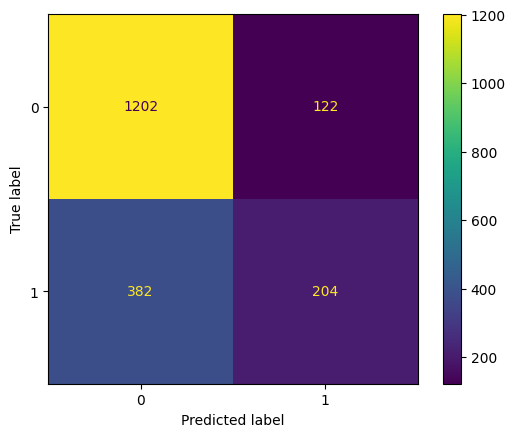

In [51]:

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()